In [6]:
from functools import partial
import numpy as np
import pandas as pd
import palettable
import matplotlib as mpl
import matplotlib.pyplot as plt
from plotting_utils import remove_spines, save_figure

In [7]:
%matplotlib inline
# set_mpl_defaults(mpl)
set1_colors     = palettable.colorbrewer.qualitative.Set1_9.mpl_colors
dark2_colors    = palettable.colorbrewer.qualitative.Dark2_8.mpl_colors
paired12_colors = palettable.colorbrewer.qualitative.Paired_12.mpl_colors

In [34]:
country = 'united-states'
year = 2001
save_figure = partial(save_figure, folder='outputs/{}-{}'.format(country, year))

In [35]:
Nx = pd.read_csv("data/{}/{}-pop-pyramid-{}.csv".format(country, country, year)) # Nx = number in each age class
Nx.head()

,Age,Number
0,0-4,19107
1,5-9,20390
2,10-14,20760
3,15-19,20596
4,20-24,19645


Convert number alive (in each age group) to numeric

In [36]:
#Nx.ix[:, 1] = Nx.ix[:, 1].str.replace(',', '')
Nx = Nx.convert_objects(convert_numeric=True)

/Users/ocsicnarf/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


In [37]:
print 'population (thousands) is', Nx.Number.sum()

population (thousands) is 285797


See the pyramid

['outputs/united-states-2001/age-distribution-observed-0.pdf',
 'outputs/united-states-2001/age-distribution-observed-0.png']

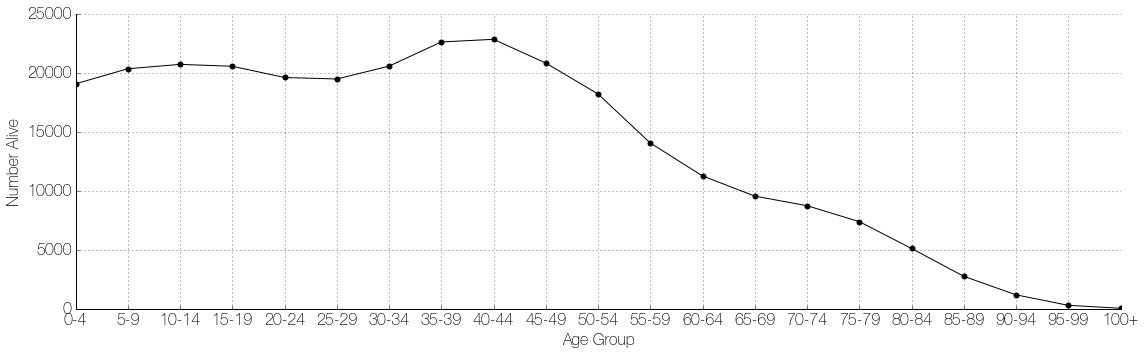

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5))
original = pd.Series.copy(Nx.Number)
ax.plot(Nx.Number, marker='o')
ax.set_xticks(np.arange(len(Nx.Age)))
ax.set_xticklabels(Nx.Age)
ax.grid()
ax.set_xlabel("Age Group")
ax.set_ylabel("Number Alive")
remove_spines(ax)
fig.tight_layout()
save_figure(fig, "age-distribution-observed", exts=['pdf', 'png'])

If dealing with US, smooth out the younger part of the pyramid

In [39]:
if country == 'united-states':
    Nx.Number.ix[:9] = Nx.Number.ix[:9].mean()

['outputs/united-states-2001/age-distribution-observed-smoothed-6.pdf',
 'outputs/united-states-2001/age-distribution-observed-smoothed-6.png']

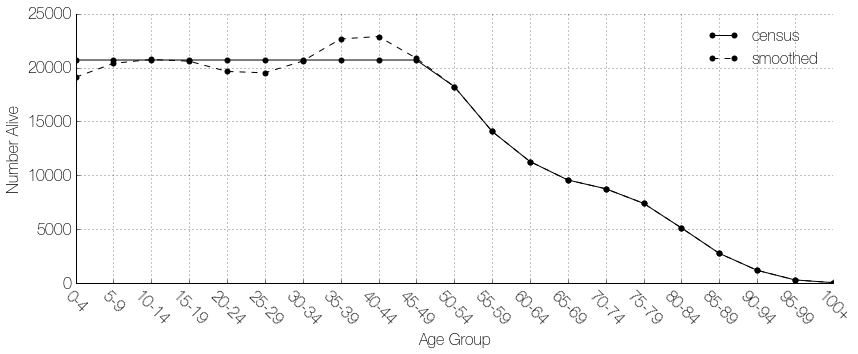

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
ax.plot(Nx.Number, marker='o', label='census')
ax.plot(original, marker='o', ls='--', label='smoothed')
ax.set_xticks(np.arange(len(Nx.Age)))
ax.set_xticklabels(Nx.Age, rotation=-45)
ax.grid()
ax.set_xlabel("Age Group")
ax.set_ylabel("Number Alive")
remove_spines(ax)
fig.tight_layout()
ax.legend()
save_figure(fig, "age-distribution-observed-smoothed", exts=['pdf', 'png'])

Figure out deaths that occurred in each age group

In [48]:
Nx['Deaths'] = Nx.Number.diff(-1)
Nx.Deaths.iloc[-1] = Nx.Number.iloc[-1]

In [49]:
Nx

,Age,Number,Deaths
0,0-4,20704.7,0.0
1,5-9,20704.7,0.0
2,10-14,20704.7,0.0
3,15-19,20704.7,0.0
4,20-24,20704.7,0.0
5,25-29,20704.7,0.0
6,30-34,20704.7,0.0
7,35-39,20704.7,0.0
8,40-44,20704.7,0.0
9,45-49,20704.7,2462.7


Convert age range to just the starting age, and then fill in the missing ages

In [50]:
Nx.ix[:, 0] = Nx.ix[:,0].str.extract('(\d+)')
Nx.ix[0, 0] = 0
Nx = Nx.convert_objects(convert_numeric=True)

/Users/ocsicnarf/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':
/Users/ocsicnarf/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


In [51]:
Nx

,Age,Number,Deaths
0,0,20704.7,0.0
1,5,20704.7,0.0
2,10,20704.7,0.0
3,15,20704.7,0.0
4,20,20704.7,0.0
5,25,20704.7,0.0
6,30,20704.7,0.0
7,35,20704.7,0.0
8,40,20704.7,0.0
9,45,20704.7,2462.7


In [52]:
for a in range(int(Nx.Age.max())):
    if a not in Nx.Age.values:
        Nx.loc[len(Nx)] = [a, np.nan, np.nan] # add to end

In [53]:
Nx.sort(columns='Age', inplace=True)
Nx.reset_index(inplace=True, drop=True)

/Users/ocsicnarf/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [54]:
Nx

,Age,Number,Deaths
0,0.0,20704.7,0.0
1,1.0,NaN,NaN
2,2.0,NaN,NaN
3,3.0,NaN,NaN
4,4.0,NaN,NaN
5,5.0,20704.7,0.0
6,6.0,NaN,NaN
7,7.0,NaN,NaN
8,8.0,NaN,NaN
9,9.0,NaN,NaN


Distribute deaths over age range

In [55]:
max_age = int(Nx.Age.max())
L = 5
for g in range(max_age // L):
    Nx.ix[g*L : (g + 1)*L - 1, 2] = Nx.ix[g*L, 2] / L

#m = max_age % L
#Nx.ix[max_age - m : max_age, 2] = Nx.ix[max_age - m].Number / (m + 1)

In [56]:
Nx

,Age,Number,Deaths
0,0.0,20704.7,0.0
1,1.0,NaN,0.0
2,2.0,NaN,0.0
3,3.0,NaN,0.0
4,4.0,NaN,0.0
5,5.0,20704.7,0.0
6,6.0,NaN,0.0
7,7.0,NaN,0.0
8,8.0,NaN,0.0
9,9.0,NaN,0.0


Number of deaths should be equal to number of births

In [57]:
total_born = Nx.ix[0, 'Number']
print 'Births:', total_born
print 'Deaths:', Nx.Deaths.sum()

Births: 20704.7
Deaths: 20704.7


Probability that lifespan is _x_ years is proportion of deaths occuring at age _x_

In [58]:
Nx['Lifespan_PMF'] = Nx.Deaths / total_born

In [59]:
Nx.tail(5)

,Age,Number,Deaths,Lifespan_PMF
96,96.0,NaN,49.8,0.002405
97,97.0,NaN,49.8,0.002405
98,98.0,NaN,49.8,0.002405
99,99.0,NaN,49.8,0.002405
100,100.0,46.0,46.0,0.002222


In [60]:
Nx.Lifespan_PMF.sum()

1.0000000000000002

Plot 

['outputs/united-states-2001/lifespan-pmf-3.pdf',
 'outputs/united-states-2001/lifespan-pmf-3.png']

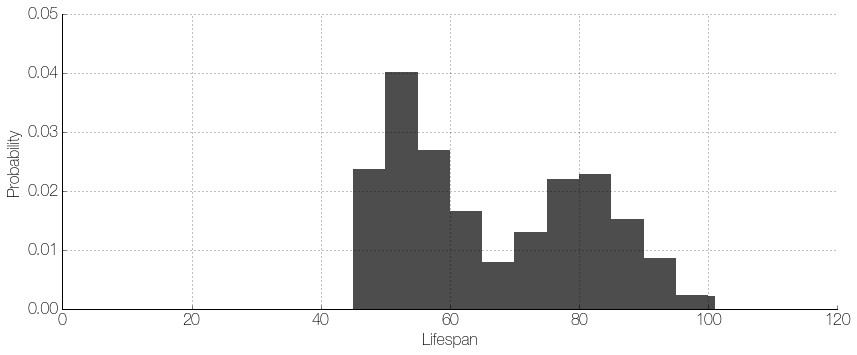

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))

ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.01))
ax.bar(Nx.Age, Nx.Lifespan_PMF, width=1, fc='.3', linewidth=0)

ax.set_ylabel('Probability')
ax.set_xlabel('Lifespan')
remove_spines(ax)
ax.grid()
fig.tight_layout()
save_figure(fig, "lifespan-pmf", exts=['pdf', 'png'])

In [62]:
print 'life expectancy', (Nx.Lifespan_PMF * Nx.Age).sum()

life expectancy 66.0129777297


In [63]:
with open("{}-lifespan-pmf-pyramid.json".format(country), 'w') as f:
    f.write('{{ "pmf": {} }}'.format(Nx.Lifespan_PMF.to_json(orient='records')))